# yfinanceによる株価履歴の取得

yfinanceは，アメリカのYahoo Finance で公開されている金融データをpython上で取得できるライブラリです。取得したデータはpandasのDataFrame形式になります。


---
[Google Colaboratoryで開く](https://colab.research.google.com/github/202408pythonciot/Data_Science_in_Finance/blob/main/Colaboratory/Base/get_history_data_yfinance.ipynb)

<a target="_blank" href="https://colab.research.google.com/github/202408pythonciot/Data_Science_in_Finance/blob/main/Colaboratory/Base/get_history_data_yfinance.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

---

## 1. 事前準備

### matplotlibの日本語化のためのライブラリをインストール

In [1]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 23.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=eeccdc05f69956e4baff10cb9bb891de784bec945e24d28715db4efdacff8581
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


### yfinanceをインポート

In [2]:
import yfinance as yf

### データ分析：pandasをインポート

In [3]:
import pandas as pd

### グラフ描画：matplotlib（日本語表示対応 japanize_matplotlibも）をインポート

In [4]:
import matplotlib.pyplot as plt
import japanize_matplotlib

### 日付計算：datetimeをインポート

In [5]:
import datetime as dt

## 2. データを取得

### 取得期間の計算
datetimeモジュールを使って，今日から180日前の日付を求め，それぞれsdayとedayの変数に代入します。

In [6]:
sday = dt.datetime.today() - dt.timedelta(days=180) # 180日前の日付を計算
eday = dt.datetime.today()
sday, eday

(datetime.datetime(2024, 5, 18, 4, 38, 34, 948382),
 datetime.datetime(2024, 11, 14, 4, 38, 34, 948478))

### データの取得
ファーストリテーリングの証券コード(9983)を使って，yfinanceから今日から180日前までの期間の株価履歴を取得します。

In [7]:
ticker = "9983.T"
df = yf.download(ticker, start=sday , end=eday)

df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,9983.T,9983.T,9983.T,9983.T,9983.T,9983.T
Date,,,,,,
2024-05-20 00:00:00+00:00,41158.570312,41360.0,41880.0,40840.0,41030.0,1148000
2024-05-21 00:00:00+00:00,41248.132812,41450.0,41870.0,41410.0,41770.0,613400
2024-05-22 00:00:00+00:00,40481.882812,40680.0,41120.0,40550.0,41120.0,969500
2024-05-23 00:00:00+00:00,40919.742188,41120.0,41140.0,40640.0,40720.0,782000
2024-05-24 00:00:00+00:00,40113.687500,40310.0,40470.0,39860.0,40160.0,1166600
...,...,...,...,...,...,...
2024-11-07 00:00:00+00:00,48690.000000,48690.0,50830.0,48420.0,50720.0,1784300
2024-11-08 00:00:00+00:00,49250.000000,49250.0,49490.0,48940.0,49390.0,1328200


yfinanceはpandasのデータフレーム形式でデータを渡してくれます。株価履歴の各列（カラム）の意味は以下の通りです。

|  | Open | High | Low | Close | Adj Close | Volume |
| --- | --- | --- | --- | --- | --- | --- |
| 日付 | 始値 | 高値 | 安値 | 終値 | 調整後終値 | 出来高 |


matplotlibを使って株価を折れ線グラフで表示します。

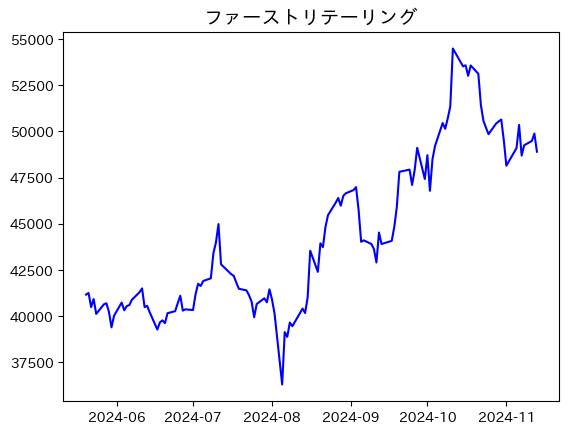

In [8]:
plt.plot(df.index, df['Adj Close'], c="b")
plt.title("ファーストリテーリング", fontsize=14)
plt.show()